<a href="https://colab.research.google.com/github/leechearien/object-detection/blob/main/car16_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VGG16을 이용한 차종 분류**


# **1) 드라이브 마운트 후 데이터 준비**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 사진 압축풀기
!unzip /content/drive/MyDrive/car16_vgg/car16_vgg.zip -d /content/drive/MyDrive/car16_vgg/data

Archive:  /content/drive/MyDrive/car16_vgg/car16_vgg.zip
   creating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/401.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/402.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/403.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/404.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/405.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/406.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/407.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/408.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/409.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/410.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/411.jpg  
  inflating: /content/drive/MyDrive/car16_vgg/data/AvanteAD/412.jpg  
  inflating: /content/drive/MyDrive/car16_

In [3]:
# library import

from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2

# **2) 이미지 데이터 변환**

In [4]:
#분류 대상과 카테고리 선택하기
caltech_dir = "/content/drive/MyDrive/car16_vgg/data"

categories = ["AvanteAD",
              "Carnival",
              "G4rexton",
              "GenesisG80",
              "GrandeurIG",
              "K5JF",
              "Kona",
              "LFSonata",
              "Morning",
              "Porter2",
              "QM6",
              "Ray",
              "SM6",
              "SantafeTM",
              "Spark",
              "Tivoli"]
nb_classes = len(categories)  #nb_classes에 분류될 클래스를 개수만큼 변수에 저장해둔다.

#이미지의 크기를 지정하기
image_w = 224
image_h = 224
pixels = image_w * image_h * 3  #pixel은 rgb값이 모두 들어가니 3을 곱해준다.

#이미지 데이터를 읽어드리기

X = []  # 실제 이미지 데이터
Y = []  # 레이블 데이터

for idx, cat in enumerate(categories):
    # 레이블 생성
    label = [0 for i in range(nb_classes)]  
    label[idx] = 1  

    # 이미지
    image_dir = caltech_dir + "/" + cat      
    files = glob.glob(image_dir+"/*.jpg")    # 확장자가 jpg인 파일을 찾기
    for i, f in enumerate(files):
        img = Image.open(f)                  # 이미지 파일을 읽어서
        img = img.convert("RGB")             # RGB 형식으로 변환하고
        img = img.resize((image_w, image_h)) # 지정해줬던 크기로 resize한다.
        data = np.asarray(img)               # numpy 배열 데이터로 변환한다.
        X.append(data)
        Y.append(label)
        #if i % 10 == 0:
            #print(i, "\n", data)

X = np.array(X)
Y = np.array(Y)

#학습 전용 데이터와 테스트 전용 데이터로 구분하기

X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, stratify=Y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/drive/MyDrive/car16_vgg/car16_vgg.npy", xy)
print("ok,", len(Y))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ok, 2800


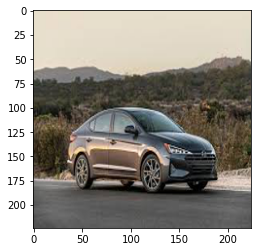

[[[231 223 204]
  [231 223 204]
  [231 223 204]
  ...
  [233 223 205]
  [234 221 204]
  [234 221 204]]

 [[231 223 204]
  [231 223 204]
  [231 223 204]
  ...
  [233 223 205]
  [234 221 204]
  [234 221 204]]

 [[231 223 204]
  [231 223 204]
  [231 223 204]
  ...
  [232 222 204]
  [234 221 204]
  [234 221 204]]

 ...

 [[ 83  83  83]
  [ 83  83  83]
  [ 83  83  83]
  ...
  [ 93  93  93]
  [ 89  89  89]
  [ 89  89  89]]

 [[ 80  80  80]
  [ 80  80  80]
  [ 81  81  81]
  ...
  [ 90  90  90]
  [ 87  87  87]
  [ 87  87  87]]

 [[ 77  77  77]
  [ 78  78  78]
  [ 80  80  80]
  ...
  [ 86  86  86]
  [ 85  85  85]
  [ 85  85  85]]]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
plt.imshow(X[0,:,:,:])
plt.show()

print(X[0,:,:,:])
print(Y[0,:])

# **3) VGG16 모델 생성하기**

In [6]:
# 데이터 불러오기
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/car16_vgg/car16_vgg.npy', allow_pickle=True)

# 데이터 정규화하기
X_train = X_train.reshape(-1, 224, 224, 3) / 255
X_test = X_test.reshape(-1, 224, 224, 3) / 255
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train shape: (2240, 224, 224, 3)
X_test shape: (560, 224, 224, 3)
y_train.shape: (2240, 16)
y_test.shape: (560, 16)


In [7]:
# vgg16 신경망을 가져오기

vgg16 = VGG16(weights = 'imagenet', input_shape = X_train.shape[1:], include_top = False)
vgg16.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
# 모델을 구성하기

model = Sequential()
model.add(vgg16)
model.add(Flatten())  
model.add(Dense(100, activation = 'relu', input_shape = X_train.shape[1:]))  # 1층
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(50, activation = 'relu')) # 2층 은닉층 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation = 'softmax'))  # 3층 출력층

model.summary()

# 모델을 설정하기
model.compile(optimizer=Adam(1e-4), 
              loss = 'categorical_crossentropy', 
              metrics=['acc']) 

# 콜백을 정의하기
callbacks = [EarlyStopping(monitor = 'val_acc', patience = 30, verbose = 1)]

# 모델 훈련하기
history= model.fit(X_train, y_train,
         batch_size = 32,
         validation_data = (X_test, y_test),
         epochs = 300,
         callbacks = callbacks) 
  
# 모델 평가하기
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

# 모델을 저장하기
model.save('/content/drive/MyDrive/car16_vgg/car16_vgg.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2508900   
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_3 (Batch (None, 50)               

20/20 [==============================] - 2s 64ms/step - loss: 0.2528 - acc: 0.9340


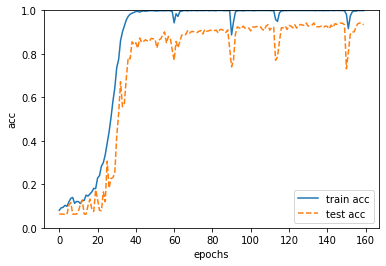

In [ ]:
# 모델 시각화

model = load_model('/content/drive/MyDrive/car16_vgg/car16_vgg.h5')

model.evaluate(X_test, y_test)

train_acc_list=history.history['acc']
train_acc_list
test_acc_list=history.history['val_acc']
test_acc_list

x = np.arange( len(train_acc_list) )
plt.plot( x, train_acc_list, label='train acc')
plt.plot( x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()

# **4) 차 이미지을 넣어서 예측해보기**

In [ ]:
img_path = '/content/drive/MyDrive/car16_vgg/rexton.jpg'

img = cv2.imread(img_path)
#img = cv2.bitwise_not(img)
print(img.shape)

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

resized_images=tf.image.resize_images(img, (224, 224))
print(resized_images.shape)

(255, 340, 3)
(224, 224, 3)


(1, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


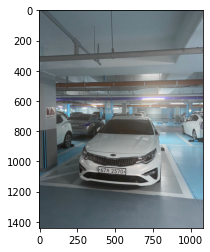

Carnival


In [ ]:
x2 =tf.reshape(resized_images, [-1,224,224,3])
print(x2.shape)

new_model = load_model('/content/drive/MyDrive/car16_vgg/car16_vgg.h5')

results = new_model.predict(x2,steps=1)

plt.imshow(img)
plt.show()

print(categories[np.argmax(results)])